# Regularising Deep Neural Networks

### Stopping Overfitting!

## 1. Dropout
- Trains an ensemble of subnetworks with shared parameters. Ensemble contains all subnetworks possible, constrained by hyperparameters controlling the probability of a particular mask.

#### Dropout is probably the most important regularization technique for ANNs.

- In every training step, turn off 50% of all neurons, randomly selected.

**How does this help with regularisation?**

- We want to stop overfitting, we don't want any part of our network to overtrain on our data and turning off half of the neurons at a time prevents this!


- In dropout, each hidden unit must learn to perform well regardless of the other units in the network. The learned robustness helps the network perform well in the face of unseen data!


- PLUS it is suuuper easy to add to your model!

In [ ]:
# from keras.layers import Dropout

# model = Sequential([
#     Dense(),
#     Dropout(0.5),
#     Activation(),
#     Dense(),
#     Activation(),

#     ...
# ])

- One thing to be aware of with Dropout is that you **might get quite a lot of oscillation on a Loss v Epochs graph!**

## NOTE: DON'T USE DROPOUT IN THE LAST LAYER! 

## 2. Early Stopping 
#### Advantages:
1. Does not require altering the network architecture or training method

2. Stops automatically at the best point rather than requiring hyperparameter tuning like weight decay

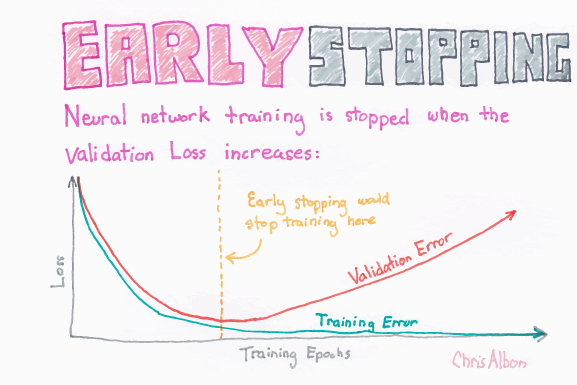

- Prevents overfitting by stopping if validation loss(or error) is not improving over a number of epochs N that you set! e.g. patience 3 or 5 or something!

## You can do both Dropout and Early Stopping 

The code is below:

In [ ]:
# from keras.callbacks import EarlyStopping

# es = EarlyStopping(monitor='val_loss', patience=3)
# model.fit(..., callbacks=[es])

## 3. Batch Normalisation

- Batch Normaliztion adds two hyperparameters per layer that normalize the inputs to the activation function to a given average and scale.

Batch Normalization has shown a couple of promising effects:

- strongly reduces training time
- improves the accuracy of the outcome
- acts as a regularization technique

As a slight drawback, the predictions take place slightly slower because of the additional operation.

We want to make sure that we're only looking at the part that interests us, where it goes from ~0 up to ~1 on the y-scale. i.e. Where the slope is. We normalise it on the x-axis to -1 to 1!

SO:

We scale the input of activation functions to get high discriminative power! 

- requires less epochs so reduces training time!
- as a side effect it helps against overfitting

#### There isn't really a reason not to use batch normalisation!
- It's also super easy to add to your code!

In [ ]:
# from keras.layers import BatchNormalization, Dropout

# model = Sequential([
#     Dense(),
#     Dropout(0.5),
#     BatchNormalization(),
#     Activation(),

#     Dense(),
#     Dropout(0.5),
#     Batch Normalization(),
#     Activation(),

#     ...
# ])

# DON'T USE DROPOUT IN THE LAST LAYER! 

### Add them in this order:
1. Batch Normalization
2. Early Stopping - need to tweak one parameter: patience
3. Dropout - can require a fair amount of parameter alteration!

With Dropout, if you're getting too much oscillation, you should first increase the number of neurons in your layer, then increase the epochs, and then consider changing the amount of neurons switched on or off!

**Note: Other regularization strategies include**:
- L1 and L2 norms
- Gradient Clipping
- Data Augmentation (with image data)